Data Initial Exploration - Business Data

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os

In [2]:
def plotTopFreq(dat, var, top_n, title):
    #cat_data.categories
    Categories={}
    for cat in dat[var].values:
        #     print(cat)
        if cat != None:
            all_categories= cat.split(",")
            all_categories = [x.strip() for x in all_categories]
        for x in all_categories:
            try :
                Categories[x] =Categories[x]+1
            except:
                Categories[x]=1
    top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
    top_categories.reset_index(inplace=True)
    top_categories.columns = ['category', 'occurance']

    x_val=top_categories.sort_values("occurance")[::-1][:top_n].occurance.values
    labels=top_categories.sort_values("occurance")[::-1][:top_n].category.values
    series = pd.Series(x_val, index=labels, name=title)
    series.plot.pie(figsize=(10, 10),startangle=90)

Business Data preview

In [5]:
# load and preview the data business
business_data = []
with open("datasets/yelp/yelp_academic_dataset_business.json", 'r', encoding='utf-8') as f:
    for line in f:
        business_data.append(json.loads(line))
business_dfa = pd.DataFrame.from_dict(business_data)
business_dfa.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
# "name" column name is ambiguous with df.name - change it
business_dfa = business_dfa.rename(columns = {'name': 'business_name'})

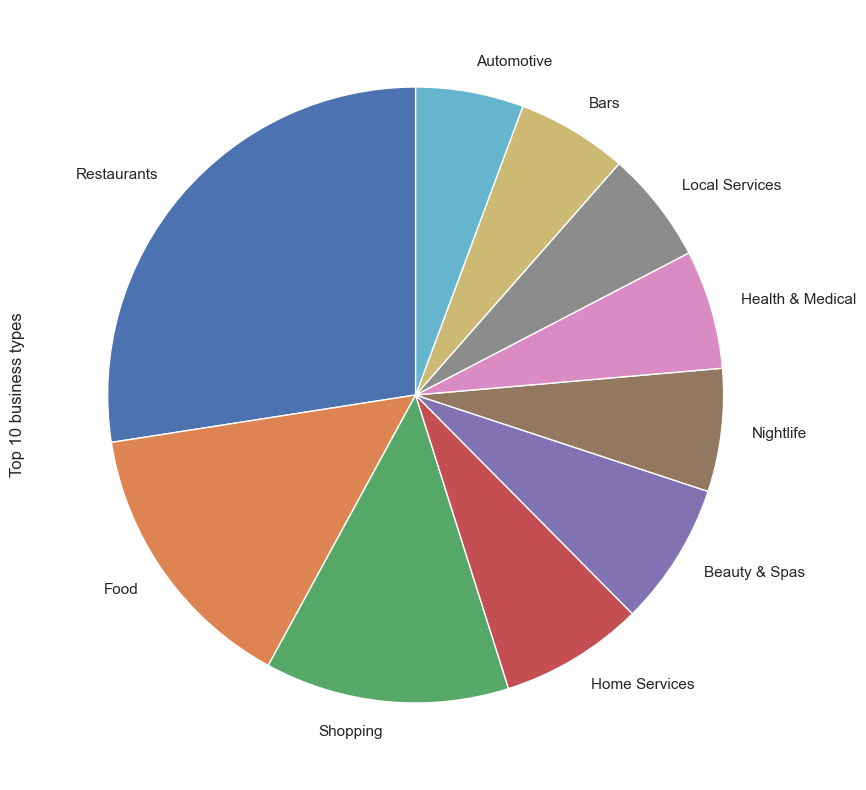

In [8]:
## Top 10 business categories
sns.set_theme(style='whitegrid')
plotTopFreq(business_dfa,"categories",10,"Top 10 business types")

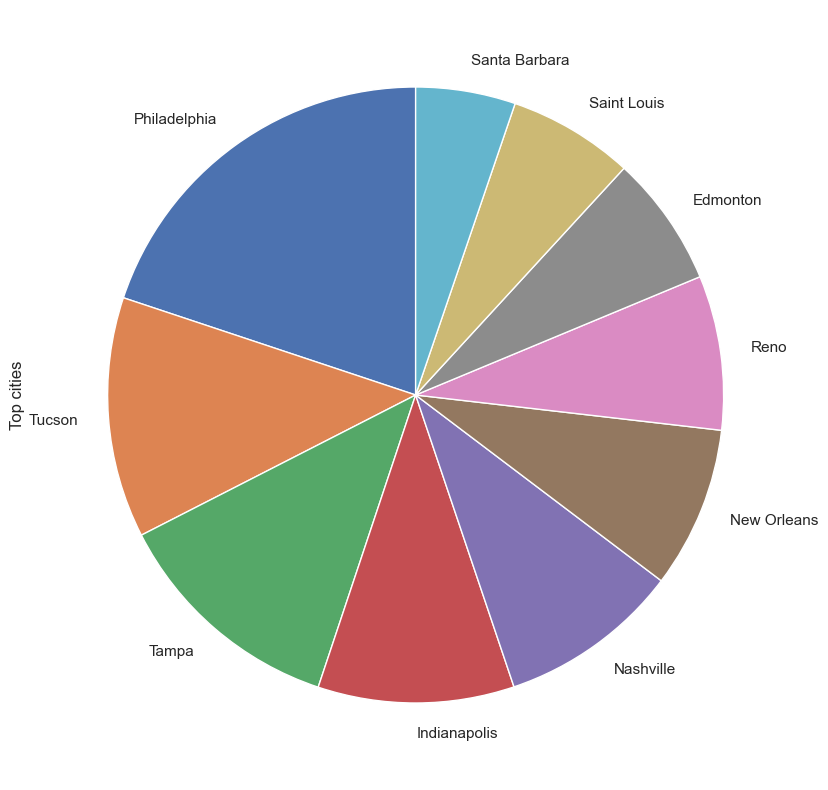

In [9]:
## top cities
plotTopFreq(business_dfa,"city",10,"Top cities")

Create the subset restaurants  

In [10]:
restaurants = (business_dfa["categories"].str.find("Restaurants")>=0)
bars = (business_dfa["categories"].str.find("Bars")>=0)
food = (business_dfa["categories"].str.find("Food")>=0)
food_restaurants_bar = [a or b or c for a, b,c in zip(restaurants, bars, food)]

In [11]:
restaurants.sum()

52268

In [12]:
np.sum(food_restaurants_bar)


66819

In [13]:
restaurants_bar = [a or b for a, b in zip(restaurants, bars)]
np.sum(restaurants_bar)

55663

First: only focus on "restaurants"

In [14]:
restaurants_df=business_dfa[restaurants]
print (restaurants_df.shape)
restaurants_df.head()

(52268, 14)


,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


Second: focus on cities where the reviews per business is high

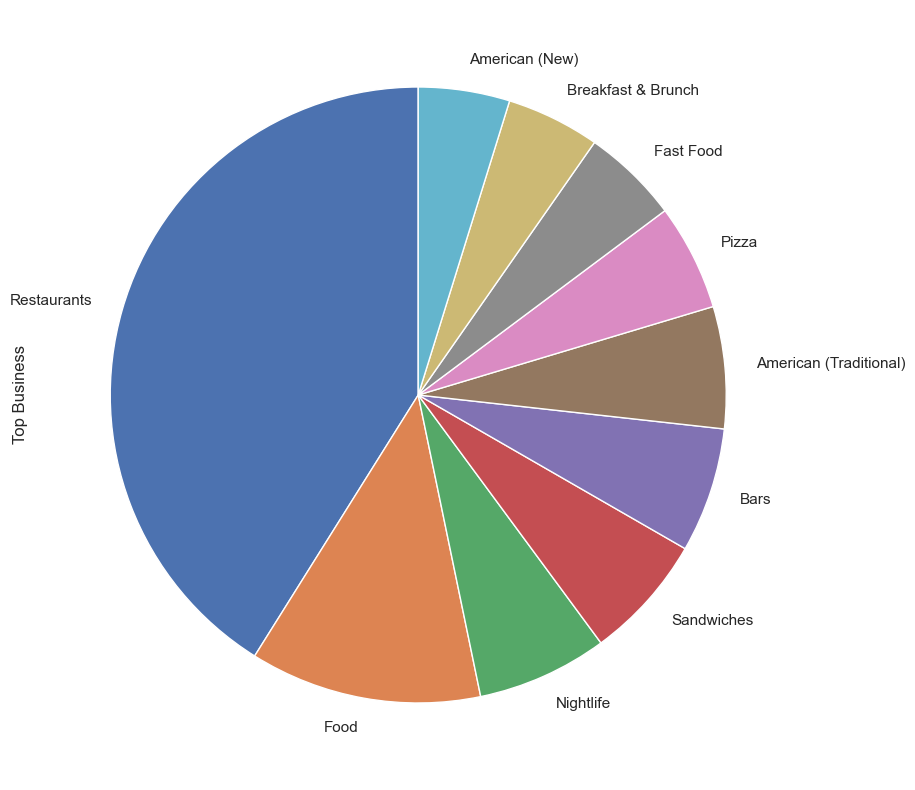

In [15]:
plotTopFreq(restaurants_df,"categories",10,"Top Business")

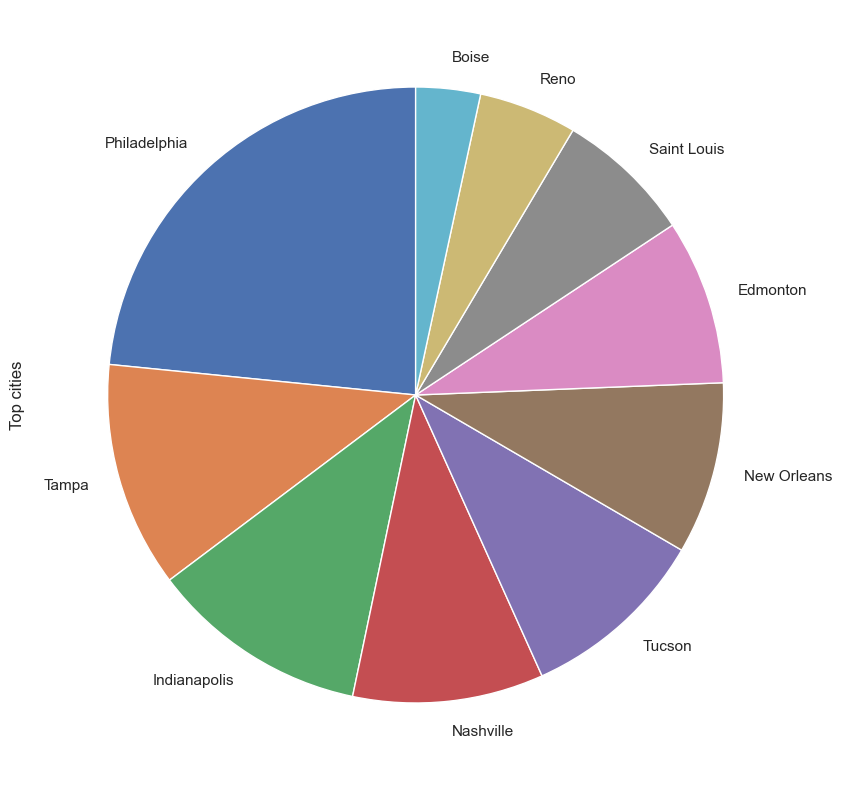

In [16]:
plotTopFreq(restaurants_df,"city",10,"Top cities")

Text(0.5, 1.0, 'top review counts')

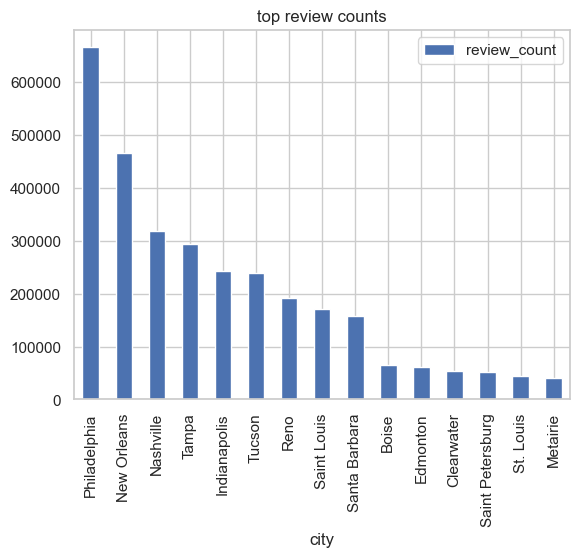

In [17]:
## restaurant review counts by city
review_count = restaurants_df.groupby("city", as_index=False)["review_count"].agg(sum).sort_values(by = "review_count", ascending = False)
top_reviews = review_count.iloc[:15]
top_reviews = top_reviews.set_index("city")
top_reviews.plot.bar()
plt.title("top review counts")

In [18]:
top_reviews

,review_count
city,
Philadelphia,665732
New Orleans,465982
Nashville,318548
Tampa,293122
Indianapolis,242024
Tucson,238851
Reno,191003
Saint Louis,171777
Santa Barbara,158247


In [19]:
top_reviews.iloc[:30].index.values

array(['Philadelphia', 'New Orleans', 'Nashville', 'Tampa',
       'Indianapolis', 'Tucson', 'Reno', 'Saint Louis', 'Santa Barbara',
       'Boise', 'Edmonton', 'Clearwater', 'Saint Petersburg', 'St. Louis',
       'Metairie'], dtype=object)

Text(0.5, 1.0, 'Median reviews per retaurants for those cities in top 15 by total reviews')

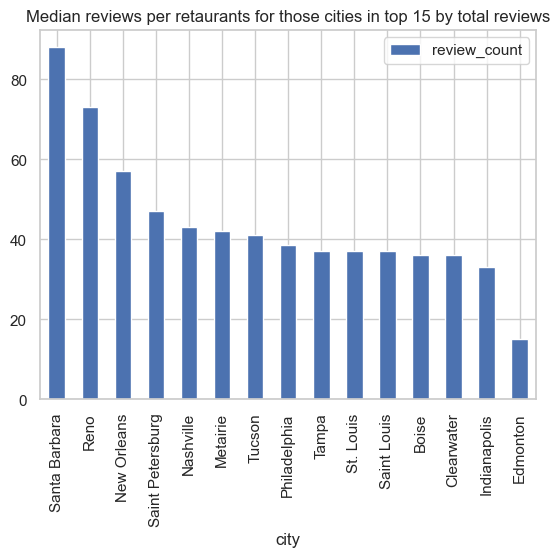

In [20]:
### Top review counts per restaurant
top_avg_reviews = restaurants_df.groupby("city", as_index=False)["review_count"].median().sort_values("review_count", ascending = False)
top_avg_reviews.loc[top_avg_reviews["city"].isin(top_reviews.index.values)].plot.bar(x = "city", y = "review_count")
plt.title("Median reviews per retaurants for those cities in top 15 by total reviews")

Our candidate cities:

In [21]:
## For simplicity, we choose the top 5 cities by review counts
top_reviews.iloc[:10]

,review_count
city,
Philadelphia,665732
New Orleans,465982
Nashville,318548
Tampa,293122
Indianapolis,242024
Tucson,238851
Reno,191003
Saint Louis,171777
Santa Barbara,158247


In [22]:
## we keep the top candidate cities that have high median reviews per restaurant
candidates = top_avg_reviews.loc[top_avg_reviews["city"].isin(top_reviews.iloc[:10].index.values)]
print("Avg reviews per restaurant:")
print(candidates)

Avg reviews per restaurant:
              city  review_count
667  Santa Barbara          88.0
619           Reno          73.0
515    New Orleans          57.0
508      Nashville          43.0
801         Tucson          41.0
577   Philadelphia          38.5
761          Tampa          37.0
655    Saint Louis          37.0
63           Boise          36.0
344   Indianapolis          33.0


In [23]:
df_res_business = restaurants_df[restaurants_df["city"].isin(candidates["city"])]
df_res_business.to_csv("datasets/yelp/business_data_subset.csv", index = None)

In [24]:
#df_res_business.head()

In [25]:
df_res_bus = pd.read_csv("datasets/yelp/business_data_subset.csv", index_col= None)
df_res_bus_ids = df_res_bus.business_id.unique()
df_res_bus.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207.0,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227.0,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
3,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
4,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."


(23591, 14)
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'number of restaurants')

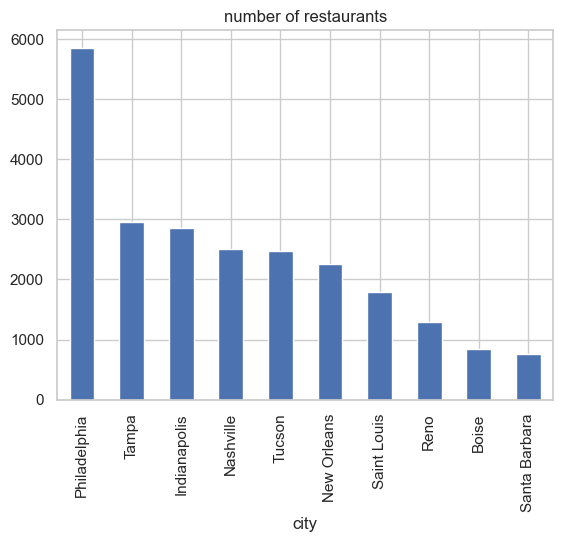

In [26]:
print(df_res_bus.shape)
print(df_res_bus.groupby(["city"])["business_id"].size().sort_values(ascending = False).plot.bar())
plt.title("number of restaurants")

********************************************************************************
Total Reviews:
AxesSubplot(0.125,0.11;0.775x0.77)
********************************************************************************
Reviews per restaurant:


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Santa Barbara,767.0,206.319426,336.432949,5.0,28.0,88.0,248.5,3834.0
Reno,1286.0,148.524883,209.178818,5.0,25.0,73.0,186.0,2506.0
New Orleans,2259.0,206.277999,491.353009,5.0,18.0,57.0,191.5,7568.0
Nashville,2502.0,127.317346,281.378346,5.0,16.0,43.0,126.0,6093.0
Tucson,2466.0,96.857664,149.520555,5.0,15.0,41.0,113.0,2126.0
Philadelphia,5852.0,113.761449,241.378560,5.0,14.0,38.5,114.0,5721.0
Saint Louis,1790.0,95.964804,180.282433,5.0,14.0,37.0,104.0,3999.0
Tampa,2960.0,99.027703,189.282634,5.0,15.0,37.0,109.0,3260.0
Boise,847.0,75.992916,122.858266,5.0,14.0,36.0,93.0,1810.0


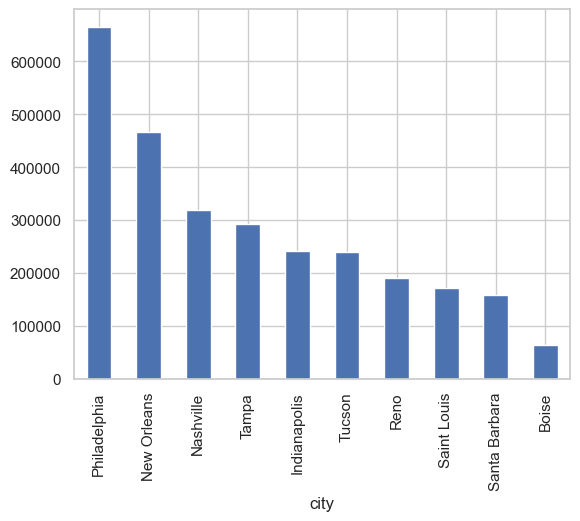

In [27]:
print("*"*80)
print("Total Reviews:")
print(df_res_bus.groupby(["city"])["review_count"].agg(sum).sort_values(ascending = False).plot.bar())
print("*"*80)
print("Reviews per restaurant:")
df_res_bus.groupby(["city"])["review_count"].describe().sort_values("50%", ascending = False) 

Data preview - TUCSON

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import os
import os.path
import math
from surprise import (Reader, Dataset, NormalPredictor, BaselineOnly,
                      accuracy, SVD, SVDpp, NMF, KNNBasic, KNNWithMeans,
                      KNNWithZScore, KNNBaseline)
from surprise.model_selection import (cross_validate, KFold,
                                      train_test_split, GridSearchCV,
                                      RandomizedSearchCV)

# Always make it pretty.
plt.style.use('ggplot')
%matplotlib inline
sns.set_style(style="whitegrid")

In [4]:
business_dft = pd.read_csv('../datasets/filter_data/tucson_business.csv', index_col= None)
### reviews in the top ten candidate cities
review_dft = pd.read_csv('../datasets/filter_data/tucson_reviews.csv')
user_dft = pd.read_csv('../datasets/filter_data/tucson_users.csv')

In [4]:
# Examine the review dataframe
business_dft.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
1,Y3ZCO17N1_T_Ms1JmswwzA,Taqueria Pico De Gallo,2618 S 6th Ave,Tucson,AZ,85713,32.192017,-110.968540,4.0,397,1,"{'RestaurantsGoodForGroups': 'True', 'Caters':...","Mexican, Restaurants","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
2,lhsQkb5nhf-Kd5OvgB9MNg,Sachiko Sushi,3210 E Valencia Rd,Tucson,AZ,85706,32.133679,-110.923443,3.5,191,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Japanese, Restaurants, Sushi Bars","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
3,XyGRDrgCK0z4CiA6nhwEaw,Persian Room Fine Dining,"9290 N Thornydale Rd, Ste 100",Tucson,AZ,85742,32.375016,-111.046320,4.5,258,1,"{'Alcohol': ""'full_bar'"", 'GoodForMeal': ""{'de...","Restaurants, Persian/Iranian, Mediterranean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
4,-3-6BB10tIWNKGEF0Es2BA,The 81 Hong Kong Cafe,"625 E Wetmore Rd, Ste 109",Tucson,AZ,85705,32.288540,-110.963144,4.0,133,1,"{'Alcohol': ""u'none'"", 'DogsAllowed': 'False',...","Coffee & Tea, Asian Fusion, Food, Bubble Tea, ...","{'Monday': '0:0-0:0', 'Wednesday': '10:0-21:0'..."


In [5]:
# Business Tucson dataset?
business_dft['business_id'].value_counts()

f82dhKNiUXsDVPMLqKYiIQ    1
bW8D7Q1LAEehQshsaypkCg    1
29Ok6gZ4JWBKshs0R0M-ZQ    1
nmkch1Q89DdFRXF1a-OgIg    1
L1TzHZ8OXfVXTfyzidstzg    1
                         ..
Iqr0Ysy5cS4j_a3cq_YWXw    1
gIIZQRP878_yceemj2bK_A    1
hJ3LjSxb2gYuVKOHbS8duQ    1
z2VVTgZ0aEYmxN4n6RHMJA    1
IeSD0nMKRFYUTnR5nZH1CQ    1
Name: business_id, Length: 702, dtype: int64

In [6]:
# Examine the review dataframe
review_dft.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
1,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26
2,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04
3,M7h8K7PrLrN8yQb3RhHLdA,CysTz612pTix75Fye6-D4Q,WLiqfxv_GhFFA5sm878a2w,5,0,1,1,Blew $80 on food for the family was worth it f...,2013-12-29 03:15:34
4,_u331rYIp7qJ7aWvLup9Ug,BUpAhzsbbKbTqyBjT8YnNQ,wa_bwyY57etHjtJ2Fw0E3g,5,0,0,0,Called in a Mediterranean chicken shawarma. Go...,2014-04-01 05:00:09


In [7]:
# Examine the user dataframe
user_dft.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,NaN,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0
1,x7YtLnBW2dUnrrpwaofVQQ,Ronskee,37,2010-05-06 00:40:56,56,29,29,NaN,"EPBLDry-ObheloH-NuvbvQ, 0GHsxjCk-Ynzx4Ihj8tjPQ...",9,...,1,0,0,0,12,33,66,66,1,12
2,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12 14:34:54,71,21,19,NaN,"gTX68_Us2eI2KjY21aOQ7g, e4nHt3ErihX7II-MHXVM1w...",1,...,0,0,0,0,1,3,0,0,0,0
3,QJI9OSEn6ujRCtrX06vs1w,J,1982,2007-03-19 18:15:32,14004,6466,9879,2010,"RyPeT_ICAtX8ah9dhDpEFw, W8r4aKPZFT3GPIQQDbqB6Q...",316,...,98,156,52,68,786,3674,2093,2093,562,1509
4,KXZ8A8h7Q9ZJRU5TM9asjw,Joanne,102,2010-03-20 17:40:40,150,42,30,NaN,"2N4UPgpSHFYJ1OZ0WcvTEQ, JgZ1-9Ii2wCzHE2ylZb6qQ...",7,...,0,0,0,0,5,6,2,2,0,2


In [8]:
# Drop unneeded columns for businesses
business_dft.drop(columns=['address', 'postal_code', 'latitude', 'longitude',
                          'attributes', 'hours'],
                 axis=1, inplace=True)

In [9]:
# Drop unneeded columns for reviews
review_dft.drop(columns=['useful', 'funny', 'cool'], axis=1, inplace=True)

In [10]:
# Drop unneeded columns for users
user_dft.drop(columns=['useful', 'funny', 'cool', 'fans', 'elite',
                      'friends', 'compliment_hot', 'compliment_more',
                      'compliment_profile', 'compliment_cute',
                      'compliment_list', 'compliment_note',
                      'compliment_plain', 'compliment_cool',
                      'compliment_funny', 'compliment_writer',
                      'compliment_photos'],
             axis=1, inplace=True)

In [11]:
# Look at the shapes of dataframes after removing columns
print(business_dft.shape)
print(user_dft.shape)
print(review_dft.shape)

(702, 8)
(68783, 5)
(191113, 6)


In [12]:
# Rename columns to avoid mix-ups
review_dft.rename(columns={'stars': 'review_stars'}, inplace=True)
business_dft.rename(columns={'stars': 'business_stars',
                            'name': 'business_name'}, inplace=True)
user_dft.rename(columns={'name': 'user_name'}, inplace=True)

In [14]:
# Combine review/user/business dfs, specifically for tucson restaraunts
review_business_dft = review_dft.merge(business_dft, on='business_id')
all_dft = review_business_dft.merge(user_dft, on='user_id')
tucson_df = (all_dft[(all_dft['city'] == 'Tucson') &
                    (all_dft['is_open'] == 1)])
tucson_df = tucson_df[tucson_df['categories'].str.contains(
    'Restaurants', case=False, na=False)]

In [15]:
# Rename columns to avoid mix-ups
all_dft.rename(columns={'review_count_x': 'business_review_count',
                       'review_count_y': 'user_review_count'},
              inplace=True)
tucson_df.rename(columns={'review_count_x': 'business_review_count',
                          'review_count_y': 'user_review_count'},
                 inplace=True)
tucson_df.reset_index(drop=True, inplace=True)

In [16]:
tucson_df.head(10)

,review_id,user_id,business_id,review_stars,text,date,business_name,city,state,business_stars,business_review_count,is_open,categories,user_name,user_review_count,yelping_since,average_stars
0,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,BK Tacos,Tucson,AZ,4.0,492,1,"Restaurants, Tacos, Mexican, Hot Dogs, Breakfa...",Goldie,50,2009-09-29 22:24:04,4.27
1,P4MSsoC3poGJigZX6cEjfA,4Uh27DgGzsp6PqrH913giQ,RhuYqAT45uIR2NNdDsolXQ,3,Breaking News: Finally broke my fast with the ...,2011-10-13 17:18:26,St Mary's Mexican Food,Tucson,AZ,4.0,207,1,"Restaurants, Mexican",Goldie,50,2009-09-29 22:24:04,4.27
2,SG2yXmwJkqRPpcBk6APIwg,4Uh27DgGzsp6PqrH913giQ,RhuYqAT45uIR2NNdDsolXQ,4,"Great carne seca, solid red chile beef. Just w...",2011-09-23 17:44:46,St Mary's Mexican Food,Tucson,AZ,4.0,207,1,"Restaurants, Mexican",Goldie,50,2009-09-29 22:24:04,4.27
3,0X6TizyjNzYK2xfijctxfA,4Uh27DgGzsp6PqrH913giQ,8QJTzIaR5FceGds8HBSIig,4,"Love the location, ambiance, roomy bar, happy ...",2011-09-02 19:34:33,Barrio Brewing,Tucson,AZ,4.0,611,1,"Nightlife, Sports Bars, Bars, Breweries, Pubs,...",Goldie,50,2009-09-29 22:24:04,4.27
4,yNAmr9WPJjC05wTXiIap9A,4Uh27DgGzsp6PqrH913giQ,Y3ZCO17N1_T_Ms1JmswwzA,4,"During my visit last week, I ate so many shrim...",2011-08-25 03:46:43,Taqueria Pico De Gallo,Tucson,AZ,4.0,397,1,"Mexican, Restaurants",Goldie,50,2009-09-29 22:24:04,4.27
5,tBpqta-04jpWHUyHieBbrA,4Uh27DgGzsp6PqrH913giQ,E3QSrua1cXWaurPitBhKGQ,4,I don't know why they're practically giving aw...,2012-01-19 00:43:49,El Sur Restaurant,Tucson,AZ,4.0,425,1,"Restaurants, Mexican, Comfort Food, New Mexica...",Goldie,50,2009-09-29 22:24:04,4.27
6,pANYe-sTUx96VLc6DWO_Zg,4Uh27DgGzsp6PqrH913giQ,0bLvKEwQaFYovyfpZ0HdJA,3,If each of the five guys sprinkled some season...,2011-10-13 19:32:58,Five Guys,Tucson,AZ,3.5,118,1,"Restaurants, Burgers, American (New), Fast Food",Goldie,50,2009-09-29 22:24:04,4.27
7,ebtywIg7nd7Nh3ttWcBh5Q,4Uh27DgGzsp6PqrH913giQ,IKMAgK2m6WRIViVFB2vAFQ,4,"Thank you, Miss Saigon, for feeding me. Thank ...",2011-08-03 19:23:18,Miss Saigon,Tucson,AZ,4.0,702,1,"Vegetarian, Vietnamese, Restaurants, Noodles",Goldie,50,2009-09-29 22:24:04,4.27
8,BGuV1sr8tOXwUoRBXPFLpA,4Uh27DgGzsp6PqrH913giQ,E2l9h35n-BpwWpV5RVye-w,5,"This place is incredible. Condiments, condimen...",2011-03-16 05:31:42,Lee Lee International Supermarkets,Tucson,AZ,4.5,241,1,"Ethnic Grocery, Food, Ethnic Food, Grocery, Sp...",Goldie,50,2009-09-29 22:24:04,4.27
9,0uP5fLzYxY23IAsZl2LP6Q,4Uh27DgGzsp6PqrH913giQ,BTblqXsOHMXjcgcYkdzuqg,4,I really like this place. It's cute. The folks...,2011-03-16 05:57:38,47 Scott,Tucson,AZ,4.0,449,1,"Restaurants, Nightlife, Breakfast & Brunch, Am...",Goldie,50,2009-09-29 22:24:04,4.27


In [18]:
# Save edited dataframes to csv files
all_dft.to_csv('../datasets/filter_data/all_dft.csv')
tucson_df.to_csv('../datasets/filter_data/tucson_df.csv')

(0.0, 4000.0)

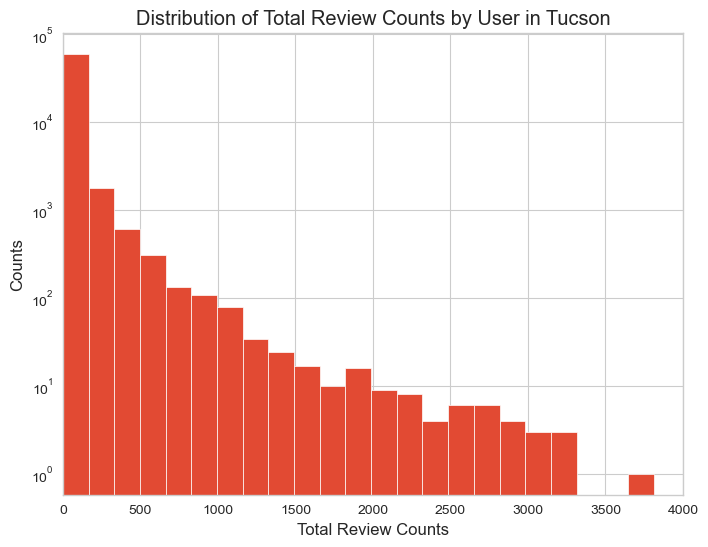

In [19]:
# Look at recorded review count by user
fig, ax = plt.subplots(figsize=(8,6))
tucson_df.groupby('user_id').mean()['user_review_count'].hist(ax=ax, bins=100)
ax.set_title('Distribution of Total Review Counts by User in Tucson')
ax.set_xlabel('Total Review Counts')
ax.set_ylabel('Counts')
ax.set_yscale('log')
ax.set_xlim((0,4000))

Text(0, 0.5, 'Counts')

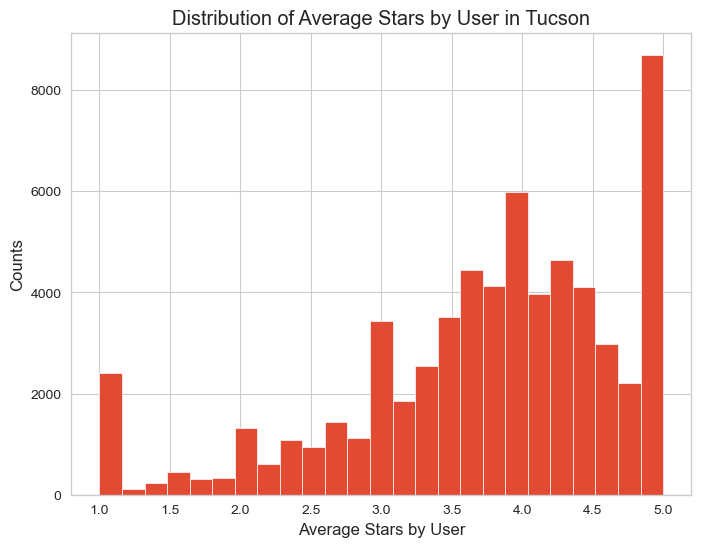

In [20]:
# Average star rating by user
fig, ax = plt.subplots(figsize=(8,6))
tucson_df.groupby('user_id').mean()['average_stars'].hist(ax=ax, bins=25)
ax.set_title('Distribution of Average Stars by User in Tucson')
ax.set_xlabel('Average Stars by User')
ax.set_ylabel('Counts')

array([[<AxesSubplot:title={'center':'review_stars'}>]], dtype=object)

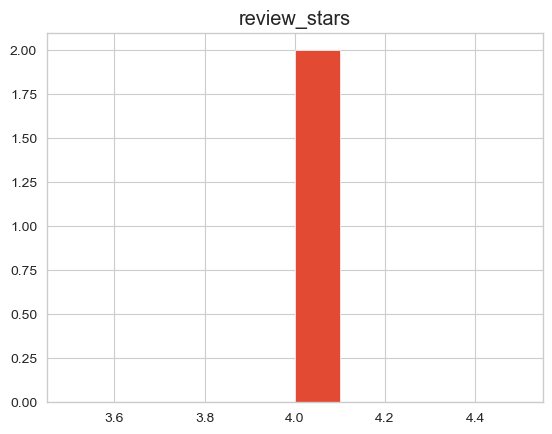

In [21]:
# Review distribution for power user BRUCE
tucson_df[tucson_df['user_id'] ==
          'hWDybu_KvYLSdEFzGrniTw'].hist(column='review_stars')

Text(0, 0.5, 'Counts')

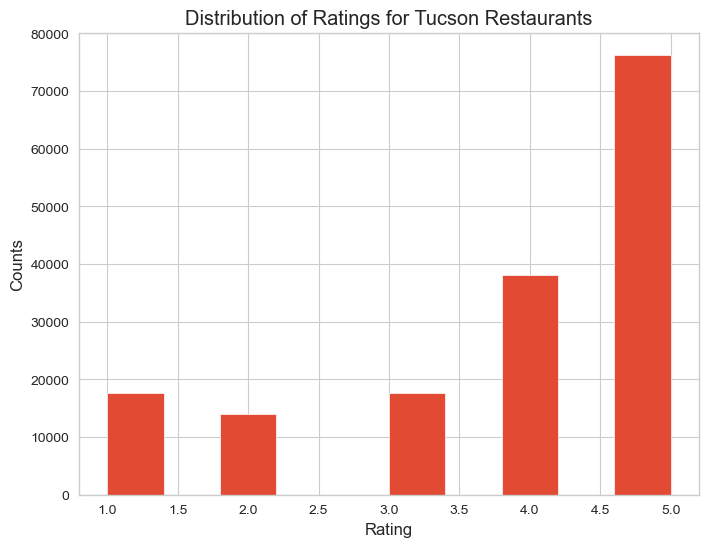

In [23]:
# Distribution of ratings for Charlotte restaurants
fig, ax = plt.subplots(figsize=(8,6))
tucson_df['review_stars'].hist(ax=ax)
ax.set_title('Distribution of Ratings for Tucson Restaurants')
ax.set_xlabel('Rating')
ax.set_ylabel('Counts')

In [24]:
tucson_df['review_stars'].value_counts()

5    76319
4    38045
3    17689
1    17572
2    13909
Name: review_stars, dtype: int64

In [25]:
tucson_df['review_stars'].mean()

3.866058434331699

In [26]:
# Get the density of our matrix
unique_users = len(tucson_df['user_id'].unique())
unique_businesses = len(tucson_df['business_id'].unique())
total_reviews = tucson_df.shape[0]
total_reviews / (unique_businesses * unique_users)

0.004554696238463835

In [27]:
tucson_df.shape[0]

163534

In [28]:
# Examining the most common fast food reviews, out of curiosity
tucson_df[tucson_df['categories'].str.contains(
    'fast food', case=False, na=False)]['business_name'].value_counts()

In-N-Out Burger                           573
Goodness Fresh Food and Juice Bar         348
Aqui Con El Nene                          335
MOD Pizza                                 305
Pei Wei Asian Kitchen                     304
Culver's                                  257
Blake's Lotaburger                        228
Greek House                               222
The Taco Shop Company                     185
Freddy's Frozen Custard & Steakburgers    157
The Habit Burger Grill                    146
Raising Cane's                            144
Micha's                                   137
Chick-fil-A                               128
Five Guys                                 121
Smashburger                               117
Luke’s Italian Beef                       116
Denny's                                   111
Popeyes Louisiana Kitchen                 106
Name: business_name, dtype: int64

In [29]:
# Examine the utility matrix via pivot table
tucson_pivot = tucson_df.pivot_table(values='review_stars',
                                     index='user_id',
                                     columns='business_id')

Min number of ratings: 1


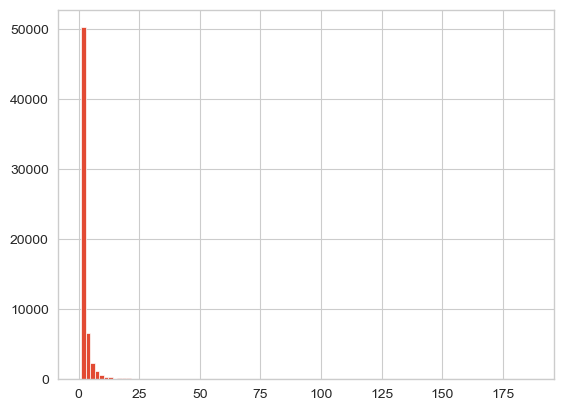

In [30]:
user_ratings = (tucson_pivot > 0).sum(axis=1)
user_ratings.hist(bins=100)
print('Min number of ratings: {}'.format(user_ratings.min()))

In [34]:
# How many users only have 1 review?
user_ratings[user_ratings.values == 1].count()

40458

In [35]:
user_ratings[user_ratings.values == 2].count()

9788

In [36]:
# Make a table of review counts for easy comparison
num_of_ratings = []
num_of_reviews = []
for num in range(1,51):
    num_of_ratings.append(num)
    num_of_reviews.append(user_ratings[user_ratings.values == num].count())
d = {'ratings': num_of_ratings, 'count': num_of_reviews}
num_of_df = pd.DataFrame(data=d)
num_of_df.head(10)

,ratings,count
0,1,40458
1,2,9788
2,3,4234
3,4,2328
4,5,1435
5,6,904
6,7,656
7,8,464
8,9,388
9,10,288


In [37]:
user_ratings[user_ratings.values > 2].count()

12634

Min number of ratings: 100


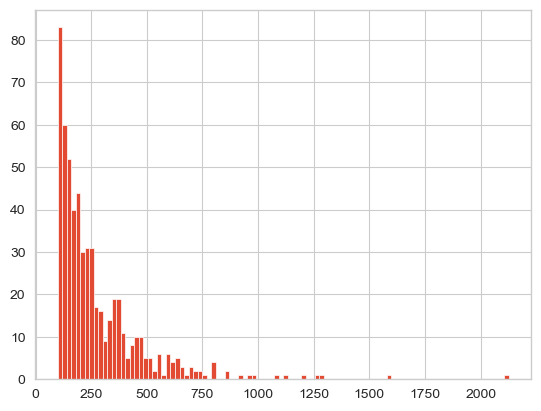

In [38]:
rest_ratings = (tucson_pivot > 0).sum(axis=0)
rest_ratings.hist(bins=100)
print('Min number of ratings: {}'.format(rest_ratings.min()))

In [39]:
# Create a utility matrix of user ids, business ids, and reviews
utility = tucson_df[['user_id', 'business_id', 'review_stars']]
utility.head()

,user_id,business_id,review_stars
0,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4
1,4Uh27DgGzsp6PqrH913giQ,RhuYqAT45uIR2NNdDsolXQ,3
2,4Uh27DgGzsp6PqrH913giQ,RhuYqAT45uIR2NNdDsolXQ,4
3,4Uh27DgGzsp6PqrH913giQ,8QJTzIaR5FceGds8HBSIig,4
4,4Uh27DgGzsp6PqrH913giQ,Y3ZCO17N1_T_Ms1JmswwzA,4


<AxesSubplot:>

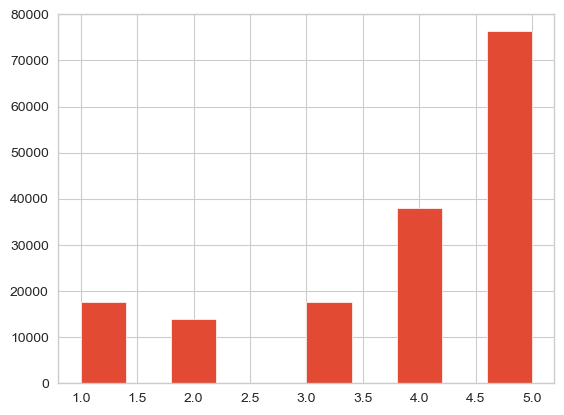

In [40]:
utility['review_stars'].hist()